# 检查并处理建成区数据集
以祖鲁（尼日利亚）为例，城市的尺度只有不到10km，但是以100km为半径取图像，会使得整个图像比较黑。

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px


Algeria-Ghardaïa-Ghardaia
Sudan-Al Qadarif-Al Galabat
Kenya-Murang-a-Kigumo
Morocco-Chaouia - Ouardigha-Khouribga
Uzbekistan-Kashkadarya-Dehqonobod
Guyana-Demerara-Mahaica-City of Georgetown
Sudan-River Nile-Shendi
Haiti-Sud-Est-Bainet
Uzbekistan-Bukhoro-Qorako_l
Argentina-Buenos Aires-Pergamino
Nigeria-Benue-Ogbadibo
Indonesia-Papua-Puncak
India-Mizoram-Lunglei
Indonesia-Kalimantan Tengah-Barito Utara
Cameroon-Nord-Ouest-Donga Mantung
Nigeria-Kebbi-Ngaski
Thailand-Nakhon Si Thammarat-Pak Phanang
Mali-Mopti-Youwarou
Nigeria-Kebbi-Zuru
India-Chhattisgarh-Narayanpur
Brazil-Bahia-Itabuna
South Africa-Eastern Cape-Joe Gqabi
Philippines-Agusan del Norte-Butuan City
Indonesia-Maluku-Kepulauan Aru
Papua New Guinea-Eastern Highlands-Kainantu
Haiti-Centre-Cerca La Source
Colombia-Boyacá-Duitama
Uganda-Mbarara-Rwampara
Kenya-Nandi-Chesumei
Peru-Cusco-Cusco
Ireland-Kerry-None
Kenya-Makueni-Kibwezi West
Pakistan-Sind-Sukkur
India-Uttar Pradesh-Lalitpur
Burkina Faso-Sahel-Séno
Kenya-Nyeri-Kieni
Mal

count: 4129


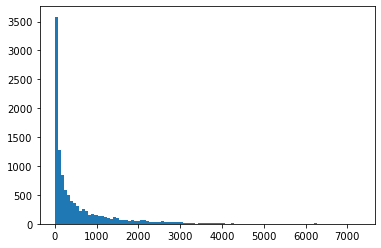

In [12]:
sum_list=[]
count=0
for root,dirs,files in os.walk(r"..\global_city_dataset\train\built-up area 2014 resize"):
    for file in files:
        img=Image.open(root+'/'+file).convert('F')
        img_arr=np.array(img)/255.0
        img_sum=img_arr.sum()
        sum_list.append(img_sum)
        if img_sum <100:
            print(file[file.index('-')+1:file.rindex('.')])
            '''if(img_sum>100):
                plt.imshow(img_arr)
                plt.title(file[file.index('-')+1:file.rindex('.')])
                plt.show()
                plt.close()
                print(img_sum,img_arr.max())'''
            count+=1
    plt.hist(sum_list,bins=100)
    #plt.show()
    #plt.close()
    fig = px.histogram(sum_list)
    fig.show()
    print("count:",count)

In [3]:
fig = px.histogram(sum_list,nbins=1000)
fig.show()
print("count:",count)

count: 1984


In [13]:
# 分离数据集
# 提取文件名
filename_list=[]
for root,dirs,files in os.walk(r"..\global_city_dataset\train\built-up area 2014 resize"):
    for file in files:
        img=Image.open(root+'/'+file).convert('F')
        img_arr=np.array(img)/255.0
        img_sum=img_arr.sum()
        sum_list.append(img_sum)
        if img_sum <100:
            filename_list.append(file)
filename_list

['1-Algeria-Ghardaïa-Ghardaia.png',
 '10001-Sudan-Al Qadarif-Al Galabat.png',
 '10005-Kenya-Murang-a-Kigumo.png',
 '10007-Morocco-Chaouia - Ouardigha-Khouribga.png',
 '10009-Uzbekistan-Kashkadarya-Dehqonobod.png',
 '10013-Guyana-Demerara-Mahaica-City of Georgetown.png',
 '10014-Sudan-River Nile-Shendi.png',
 '10018-Haiti-Sud-Est-Bainet.png',
 '10024-Uzbekistan-Bukhoro-Qorako_l.png',
 '10026-Argentina-Buenos Aires-Pergamino.png',
 '10027-Nigeria-Benue-Ogbadibo.png',
 '10028-Indonesia-Papua-Puncak.png',
 '10035-India-Mizoram-Lunglei.png',
 '10036-Indonesia-Kalimantan Tengah-Barito Utara.png',
 '10037-Cameroon-Nord-Ouest-Donga Mantung.png',
 '10039-Nigeria-Kebbi-Ngaski.png',
 '1004-Thailand-Nakhon Si Thammarat-Pak Phanang.png',
 '10040-Mali-Mopti-Youwarou.png',
 '10048-Nigeria-Kebbi-Zuru.png',
 '1005-India-Chhattisgarh-Narayanpur.png',
 '10054-Brazil-Bahia-Itabuna.png',
 '10060-South Africa-Eastern Cape-Joe Gqabi.png',
 '10061-Philippines-Agusan del Norte-Butuan City.png',
 '10065-Indones

In [20]:
import shutil
# 移动文件
for root,dirs,files in os.walk(r"..\global_city_dataset\train"):
    for dir in dirs:
        if os.path.exists("../little_city_dataset/"+dir)==False:
            os.makedirs("../little_city_dataset/"+dir)
        #检查后缀
        if os.path.splitext(os.listdir(root+"/"+dir)[0])[1]=='.png':  
            print(os.path.splitext(os.listdir(root+"/"+dir)[0])[1])
            for file in filename_list:
                if os.path.exists("../little_city_dataset/"+dir+'/'+file)==False:
                    shutil.move(root+"/"+dir+"/"+file,"../little_city_dataset/"+dir+'/')
                    #print(root+"/"+dir+"/"+file)
        else:
            for file in filename_list:
                if os.path.exists("../little_city_dataset/"+dir+'/'+file.replace(".png",".tiff"))==False:
                    shutil.move(root+"/"+dir+"/"+file.replace(".png",".tiff"),"../little_city_dataset/"+dir+'/')
                    #print(root+"/"+dir+"/"+file.replace(".png",".tiff"))

.png
.png
.png
.png
.png
.png
.png
